# Carregando os pacotes utilizados

In [138]:
import pandas as pd
import seaborn as sns

# Carregando o conjunto de dados

In [139]:
nome_coluna_alvo = 'Saude'
dataset = pd.read_csv('dataset_saude.csv')

# Plotando Features dataset

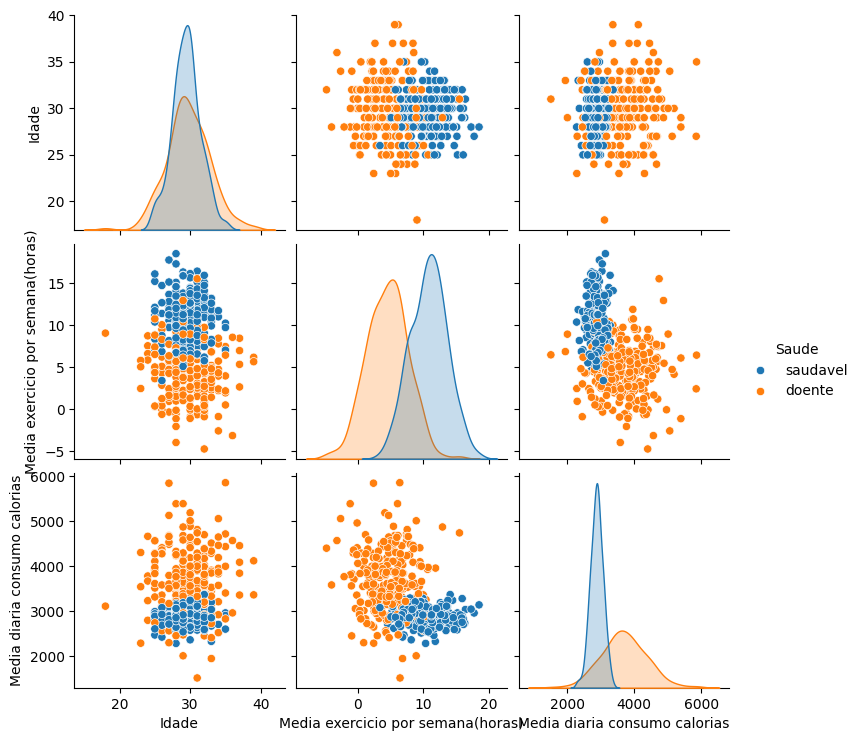

In [140]:
sns.pairplot(dataset[['Idade', 'Media exercicio por semana(horas)', 
                      'Media diaria consumo calorias', 'Saude']], hue='Saude')

# Classificando o dataset utilizando SVM

In [141]:
from sklearn import svm
from sklearn.model_selection import train_test_split

# Divindindo o conjunto de dados em treino e teste.

- A coluna de rótulo (label) está sendo separada das características (features) `dataset.drop(['label'], axis=1)`
- Depois é indicado só a coluna que contém os rótulos separado dos outros dados `dataset['label']`
- É separado 20% dos exemplos para compor o conjunto de teste `test_size=0.2`
- Os exemplos são embaralhados `shuffle=True`
- A quantidade de exemplos de cada rótulo é balanceado nos conjuntos de treinamento e teste `stratify=dataset['label']`

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop([nome_coluna_alvo], axis=1), dataset[nome_coluna_alvo], 
    test_size=0.2, shuffle=True, stratify=dataset[nome_coluna_alvo]
)

# Instanciando o classificador SVM
- Os parâmetros de aprendizado são os padrões, só é alterado para mostrar dados do treinamento

In [143]:
clf = svm.SVC(kernel='linear', gamma=10)

# Etapa de treinamento do modelo SVM

In [144]:
clf.fit(X_train, y_train)

SVC(gamma=10, kernel='linear')

# Predizendo as classes dos exemplos não usados durante o treinamento

In [145]:
y_predit_clf = clf.predict(X_test)

# Calculando a acurácia do modelo

In [146]:
acc = sum(y_test.to_numpy() == y_predit_clf) / len(y_test)

print(f'{acc * 100}% de acurácia')

93.0% de acurácia


# Métricas de avaliação da classificação

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predit_clf, 
                            target_names=['doente', 'saudavel']))

              precision    recall  f1-score   support

      doente       0.94      0.92      0.93        50
    saudavel       0.92      0.94      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

